In [1]:
import cv2
import matplotlib.pyplot as plt
import glob 
import random
import os

## Install Ultralytics Package
```python
!pip install ultralytics  # Uncomment this if not installed
```

In [2]:
%uv pip install ultralytics

/home/anifyuli/Developments/Python/college/Computer Vision/yolo_image_detection/.venv/bin/python: No module named uv
Note: you may need to restart the kernel to use updated packages.


## Visualize Images from the Dataset

In [3]:
# Function to convert bounding boxes in YOLO format to xmin, ymin, xmax, ymax.
def yolo2bbox(bboxes):
    xmin, ymin = bboxes[0]-bboxes[2]/2, bboxes[1]-bboxes[3]/2
    xmax, ymax = bboxes[0]+bboxes[2]/2, bboxes[1]+bboxes[3]/2
    return xmin, ymin, xmax, ymax

In [4]:
def plot_box(image, bboxes, labels):
    h, w, _ = image.shape
    for box_num, box in enumerate(bboxes):
        x1, y1, x2, y2 = yolo2bbox(box)
        xmin = int(x1 * w)
        ymin = int(y1 * h)
        xmax = int(x2 * w)
        ymax = int(y2 * h)
        thickness = max(2, int(w / 275))
        cv2.rectangle(image, (xmin, ymin), (xmax, ymax), color=(0, 0, 255), thickness=thickness)
    return image

In [5]:
def plot(image_paths, label_paths, num_samples):
    all_images = glob.glob(os.path.join(image_paths, '*.jpg')) + glob.glob(os.path.join(image_paths, '*.JPG'))
    all_images.sort()
    num_images = len(all_images)

    plt.figure(figsize=(15, 12))
    for i in range(num_samples):
        j = random.randint(0, num_images - 1)
        image_file = all_images[j]
        image_name = os.path.splitext(os.path.basename(image_file))[0]
        image = cv2.imread(image_file)

        bboxes, labels = [], []
        with open(os.path.join(label_paths, image_name + '.txt'), 'r') as f:
            for line in f.readlines():
                parts = line.strip().split()
                if len(parts) != 5:
                    continue
                label = parts[0]
                x_c, y_c, w, h = map(float, parts[1:])
                bboxes.append([x_c, y_c, w, h])
                labels.append(label)

        result_image = plot_box(image, bboxes, labels)
        plt.subplot(2, 2, i + 1)
        plt.imshow(result_image[:, :, ::-1])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

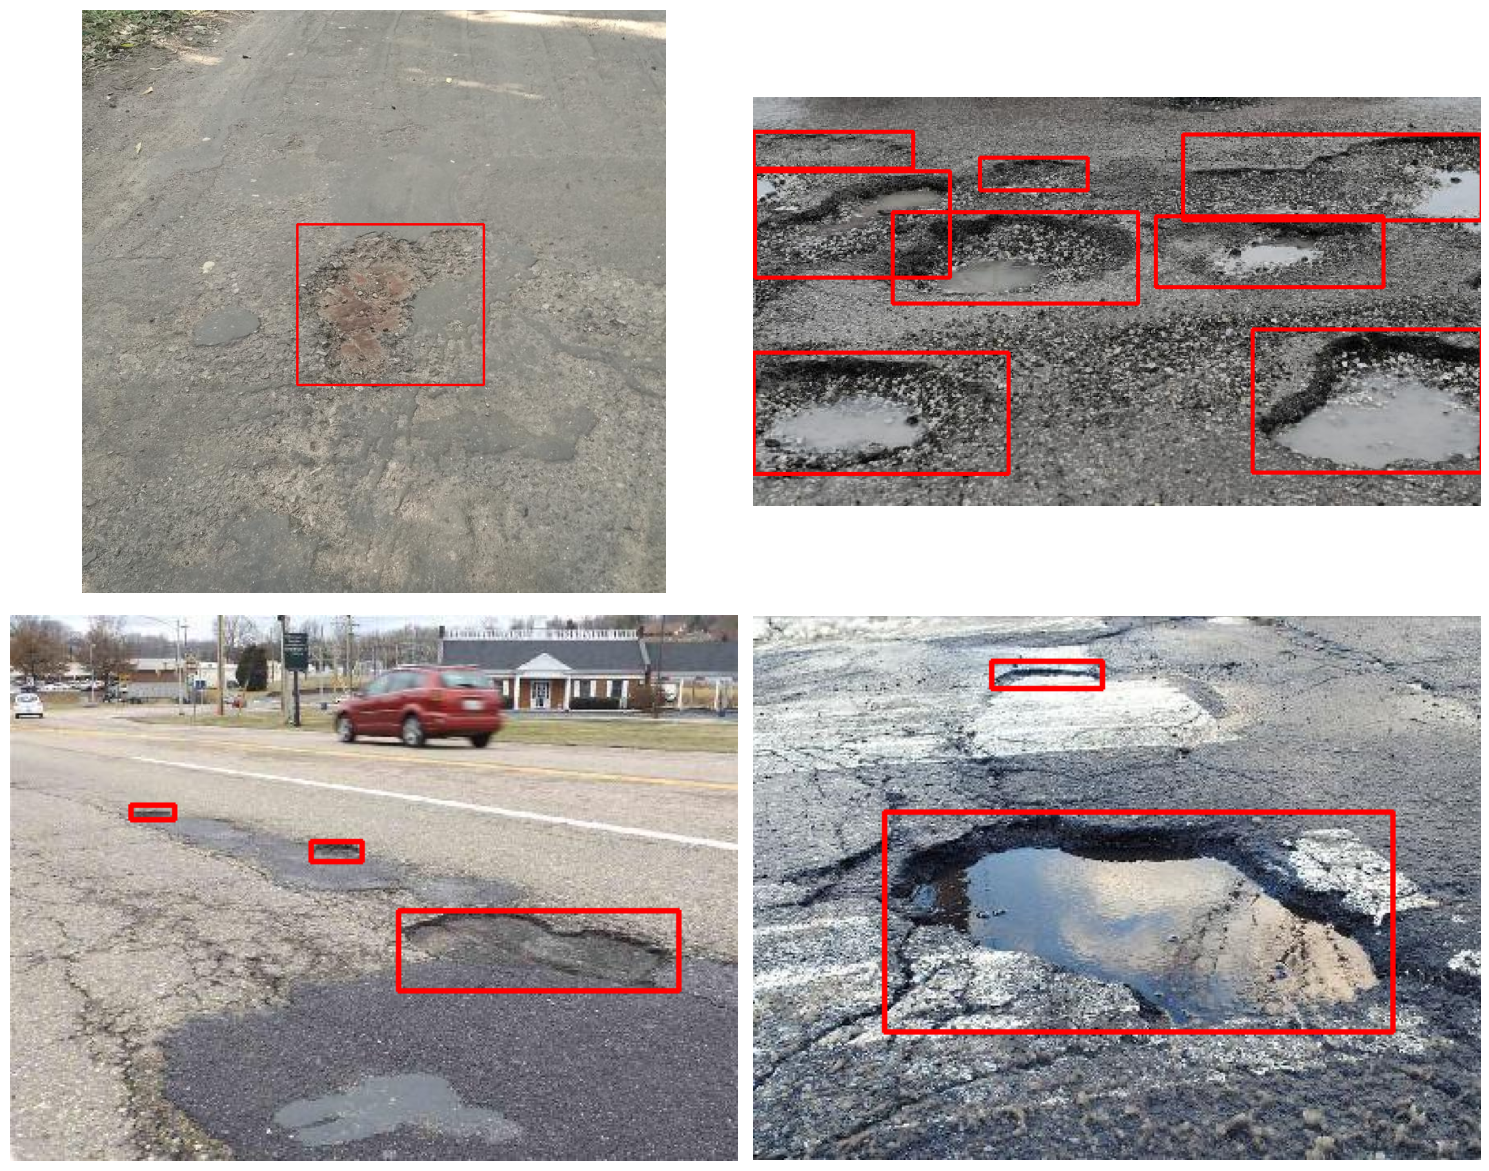

In [6]:
# Visualize a few training images.
plot(
    image_paths='yolo_dataset/images/train', 
    label_paths='yolo_dataset/labels/train',
    num_samples=4,
)

## YOLOv8 Nano Training

In [7]:
EPOCHS = 5
!uv run yolo task=detect mode=train model=yolov8n.pt imgsz=640 data=yolo_dataset/data.yaml epochs={EPOCHS} batch=2 device=cpu name=yolov8n_v8_5e

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/home/anifyuli/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
100%|███████████████████████████████████████| 6.25M/6.25M [00:42<00:00, 153kB/s]
Ultralytics 8.3.146 🚀 Python-3.12.10 torch-2.7.0+cpu CPU (Intel Core(TM) i5-8350U 1.70GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=2, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=yolo_dataset/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, 

## Evaluation on Validation Images

In [8]:
!uv run yolo task=detect mode=val model=runs/detect/yolov8n_v8_5e/weights/best.pt name=yolov8n_v8_5e_val data=yolo_dataset/data.yaml

Ultralytics 8.3.146 🚀 Python-3.12.10 torch-2.7.0+cpu CPU (Intel Core(TM) i5-8350U 1.70GHz)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2099.0±837.9 MB/s, size: 93.8 KB)
val: Scanning /home/anifyuli/Developments/Python/college/Computer Vision/yolo_im
/home/anifyuli/Developments/Python/college/Computer Vision/yolo_image_detection/.venv/lib/python3.12/site-packages/torch/utils/data/dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        133        299      0.688      0.612      0.677      0.405
Speed: 3.2ms preprocess, 141.2ms inference, 0.0ms loss, 7.4ms postprocess per image
Results saved to /home/anifyuli/Developments/Python/college/Computer Vision/yolo_image_detection/runs/detect/yolo

## Inference on Validation Images

In [9]:
!uv run yolo task=detect \
mode=predict \
model=runs/detect/yolov8n_v8_5e/weights/best.pt \
source=yolo_dataset/images/val \
imgsz=640 \
name=yolov8n_v8_5e_predict \
hide_labels=True \
save_txt=True

WARNING ⚠️ 'hide_labels' is deprecated and will be removed in in the future. Use 'show_labels' instead.
Ultralytics 8.3.146 🚀 Python-3.12.10 torch-2.7.0+cpu CPU (Intel Core(TM) i5-8350U 1.70GHz)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs

image 1/133 /home/anifyuli/Developments/Python/college/Computer Vision/yolo_image_detection/yolo_dataset/images/val/img-10.jpg: 640x640 1 pothole, 316.5ms
image 2/133 /home/anifyuli/Developments/Python/college/Computer Vision/yolo_image_detection/yolo_dataset/images/val/img-102.jpg: 640x640 2 potholes, 412.0ms
image 3/133 /home/anifyuli/Developments/Python/college/Computer Vision/yolo_image_detection/yolo_dataset/images/val/img-107.jpg: 640x640 3 potholes, 139.1ms
image 4/133 /home/anifyuli/Developments/Python/college/Computer Vision/yolo_image_detection/yolo_dataset/images/val/img-11.jpg: 640x640 1 pothole, 151.0ms
image 5/133 /home/anifyuli/Developments/Python/college/Computer Vision/yolo_image_detection/yolo_dat

## Visualize Validation Results

In [10]:
def visualize(result_dir, num_samples=4):
    plt.figure(figsize=(20, 12))
    image_names = glob.glob(os.path.join(result_dir, '*.jpg'))
    random.shuffle(image_names)
    for i, image_name in enumerate(image_names[:num_samples]):
        image = plt.imread(image_name)
        plt.subplot(2, 2, i + 1)
        plt.imshow(image)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

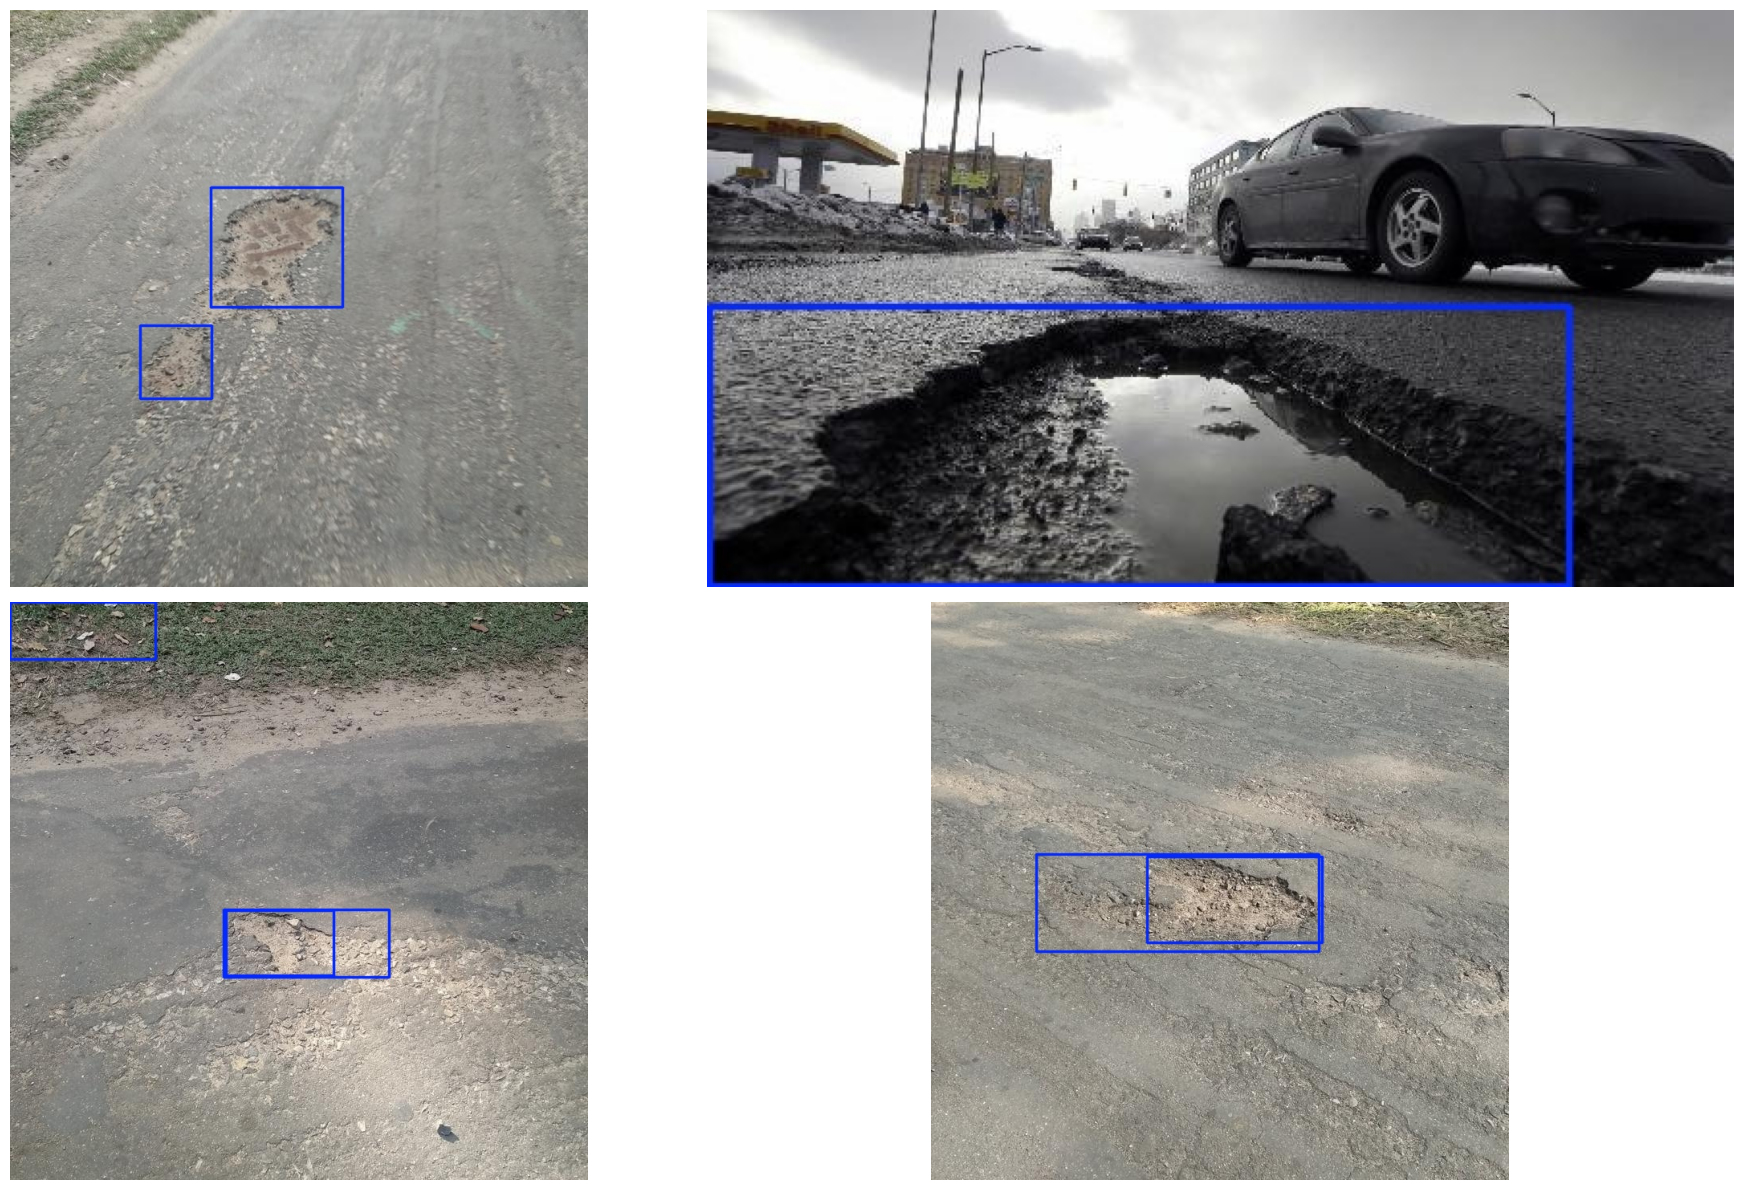

In [11]:
visualize('runs/detect/yolov8n_v8_5e_predict')